<!--NAVIGATION-->
< [自定义刻度](04.10-Customizing-Ticks.ipynb) | [目录](Index.ipynb) | [在matplotlib中创建三维图表](04.12-Three-Dimensional-Plotting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Matplotlib: Configurations and Stylesheets

# 自定义matplotlib：配置和样式单

> Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Matplotlib默认的图表配置在用户当中经常被吐槽。虽然其中很多内容都预计会在2016年底Matplotlib 2.0版本中进行更改，但是个性化配置的能力允许你按照自己的喜好来展示图表，因此还是有必要掌握的。

> Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

本节我们首先介绍基础的Matplotlib运行时配置，然后在看一看新的*样式单*特性，它们提供了很好的默认配置项。

## Plot Customization by Hand

## 手动图表配置

> Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

通过本节学习，我们会看到可以对每个独立的图表配置进行配置，直至展现的内容能够比默认样式要好。例如下面是一个很普通的默认直方图：

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

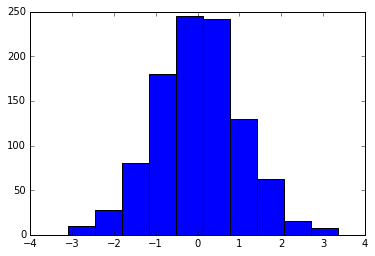

In [2]:
x = np.random.randn(1000)
plt.hist(x);

> We can adjust this by hand to make it a much more visually pleasing plot:

我们可以手动调整配置让上图看起来更加吸引人：

译者注：新版的Matplotlib中的subplot已经没有axisbg属性，下面代码使用了facecolor属性。

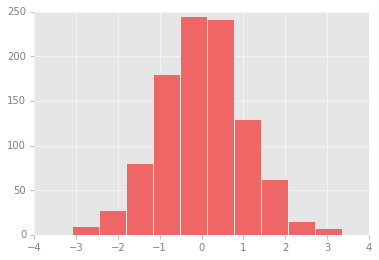

In [3]:
# 使用灰色背景
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 网格线使用白色实线
plt.grid(color='w', linestyle='solid')

# 隐藏axes的边框线
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隐藏顶部和右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 淡化刻度和标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# 设置直方的颜色和边缘色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

> This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

这看起来好多了，如果你对R语言熟悉的话，你会觉得上图看起来很像R中的ggplot可视化包的展示效果。但是这让我们付出了极大的努力。我们当然不希望每次我们绘制图表时都需要做如上完整的配置工作。幸运的是，我们有一种方法可以设置一次就对所有的图表生效。

## Changing the Defaults: ``rcParams``

## 改变默认的 `rcParams`

> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

每次Matplotlib加载时，都会对绘制的每个图表元素载入默认的样式设置。这个配置可以在任何时候使用`plt.rc`来进行调整。让我们试着修改rc的参数来让我们绘制的图表类似上面的效果。

> We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

首先我们备份`rcParams`字典值，这样能允许我们方便的重置配置。

In [4]:
IPython_default = plt.rcParams.copy()

> Now we can use the ``plt.rc`` function to change some of these settings:

下面我们可以使用`plt.rc`函数来改变配置了：

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

> With these settings defined, we can now create a plot and see our settings in action:

设置了这些之后，我们可以绘制同样的直方图查看配置的效果：

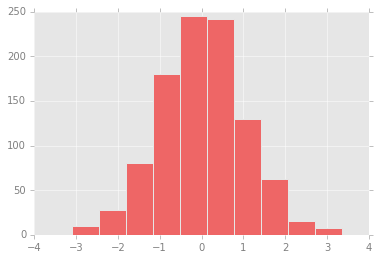

In [6]:
plt.hist(x);

> Let's see what simple line plots look like with these rc parameters:

然后在绘制一幅使用现在rc配置的简单的折线图：

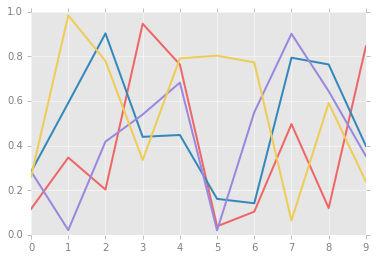

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

> I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

作者认为这比默认样式要美观的多。如果你不同意作者的审美观，你仍然可以调整rc参数来满足你自己的品味。这些配置可以保存在一个*.matplotlibrc*文件中，你可以在[Matplotlib个性化文档](http://Matplotlib.org/users/customizing.html)中查阅相关说明。上面例子表明，使用Matplotlib自己的样式单进行个性化是更好的方式。

## Stylesheets

## 样式单

> The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

2014年8月发布的Matplotlib 1.4版本加入了一个非常方便的`style`模块，它包括了很多新的预设样式单，也允许你创建自己的样式单。这些样式单的格式就像前面说过的*.matplotlibrc*文件一样，不过必须以*.mplstyle*作为扩展名。

> Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

即使你不创建自己的样式，预设的样式单也非常有用。所有预设的样式可以使用`plt.style.available`列出，为了页面简短下面代码仅列出前5个：

In [8]:
plt.style.available[:5]

['seaborn-darkgrid',
 'seaborn-dark-palette',
 '_classic_test',
 'seaborn-paper',
 'grayscale']

> The basic way to switch to a stylesheet is to call

切换样式单最基本的操作是

``` python
plt.style.use('stylename')
```

> But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

需要提醒的是这样做会改变整个会话后面所有的Matplotlib样式。当然你可以使用Python的with关键字和样式的上下文来临时使用某个样式单：

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


> Let's create a function that will make two basic types of plot:

下面我们创建一个函数用来绘制两种基础类型的图表：

In [9]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

> We'll use this to explore how these plots look using the various built-in styles.

我们使用这个函数来看看不同的预设样式单展示风格。

### Default style

### 默认样式

The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

默认样式是我们本书中一直在使用的样式；我们从默认开始。首先我们将rc参数恢复成notebook默认值：

In [10]:
# 恢复默认值
plt.rcParams.update(IPython_default);

/home/wangy/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/wangy/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/wangy/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/wangy/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/wangy/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The 

> Now let's see how it looks:

下面我们看看它展示的图表：

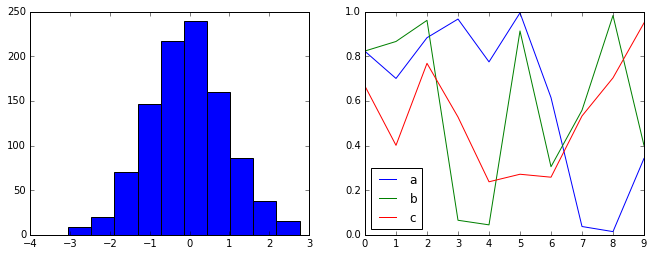

In [11]:
hist_and_lines()

### FiveThiryEight style

### 538样式

> The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

`538`样式模拟了流行的[538网站](https://fivethirtyeight.com)的图像样式。正如你下面所见，它使用了前卫的颜色，粗线条和透明axes：

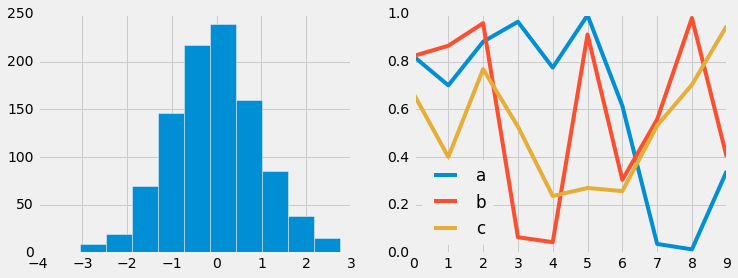

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

### ggplot

> The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

R语言中的`ggplot`包在数据科学可视化中非常受欢迎。Matplotlib的`ggplot`模拟了这个样式：

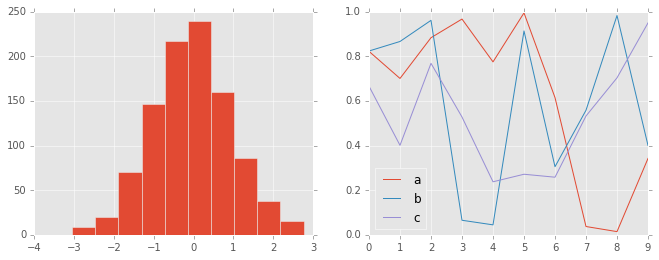

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

### 黑客的贝叶斯方法 样式

> There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

有一本非常优秀的在线短篇书籍叫做[*黑客的概率编程和贝叶斯方法*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)；书中展示的图表是使用Matplotlib创建的，这些图表使用了一套非常美观和优秀的rc参数配置，并在整本书中保持了一致。Matplotlib中用`bmh`样式单模拟了这本书的样式配置：

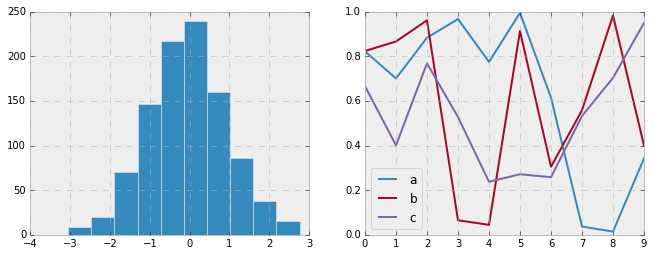

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

### 暗背景

> For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this:

对于要在演示中使用的图表，通常使用暗背景比用亮背景更加有用。`dark_background`演示提供了这个需求：

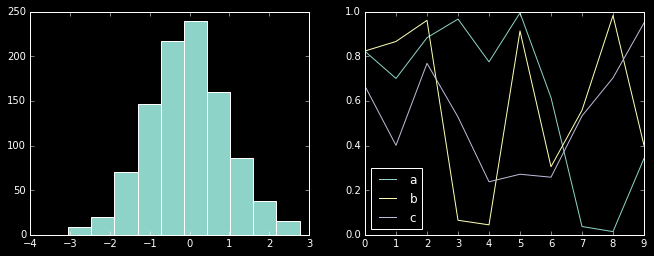

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

### 灰度

> Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style, shown here, can be very useful:

如果你需要用于黑白印刷或打印的图表，那么`grayscale`灰度样式是你需要的：

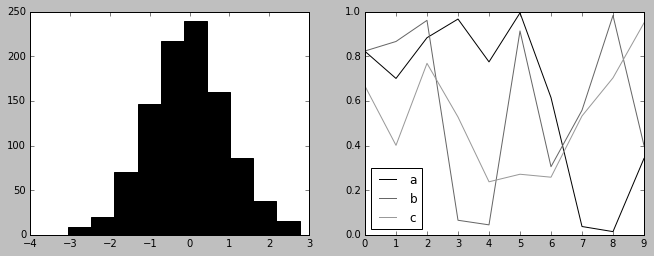

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

### Seaborn样式

> Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

Matplotlib也有受到Seaborn库启发的样式单（详见[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)）。正如我们下面看到的，当你将Seaborn载入notebook的时候，这些样式会自动被装载。作者发现这些配置非常有用，并经常作为默认的样式使用。

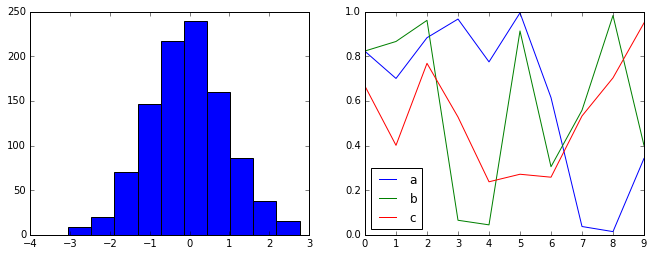

In [17]:
import seaborn
hist_and_lines()

> With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.
Throughout this book, I will generally use one or more of these style conventions when creating plots.

有了所有这些预设的选项和图表样式，Matplotlib成为了交互式可视化和创建可出版的图表的首选工具。在本书中，我们会使用一种或多种样式来创建图表。

<!--NAVIGATION-->
< [自定义刻度](04.10-Customizing-Ticks.ipynb) | [目录](Index.ipynb) | [在matplotlib中创建三维图表](04.12-Three-Dimensional-Plotting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
